<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Name> Samuel Carpenter
    <Class> Section 3
    <Date> 11/19/20

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from imageio import imread
from scipy import linalg as la

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    newImg = np.reshape(image, (m,n))
    plt.axis("off")
    plt.imshow(newImg, cmap="gray")
    plt.show()


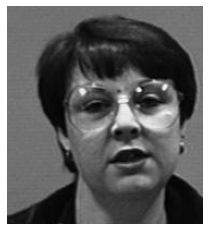

In [4]:
faces = get_faces()
show(faces[:,0])

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces()
        m,n = self.F.shape
        self.meanFace = (1/n) * sum([face for face in self.F.T])
        self.FBar = self.F - np.array(([self.meanFace,] * n)).transpose()
        U, Sigma, Vh = la.svd(self.FBar)
        self.U = U

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return self.U[:,:s].T @ A            

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        FHat = self.project(self.F, s)
        gHat = self.project(g, s)
        
        differenceMatrix = FHat - np.reshape(gHat, (s,1))
        norms = la.norm(differenceMatrix, axis=0)
        return np.argmin(norms)

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        
        matchIndex = self.find_nearest(image, s)
        matchingFace= self.F[:,matchIndex]
        
        ax1 = plt.subplot(121)
        ax1.imshow(np.reshape(image, (m,n)), cmap="gray")
        ax1.set_title("Image Input")
        
        ax2 = plt.subplot(122)
        ax2.imshow(np.reshape(matchingFace, (m,n)), cmap="gray")
        ax2.set_title("Closest Image")
        
        plt.show()
        

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [6]:
facialRec = FacialRec()

Mean Face


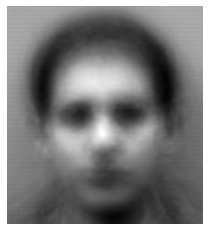

Original Image


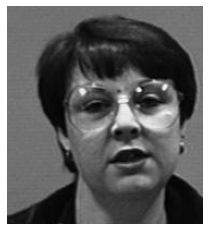

Mean Shifted Image


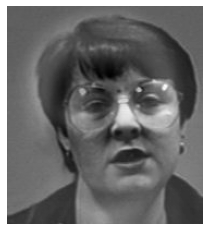

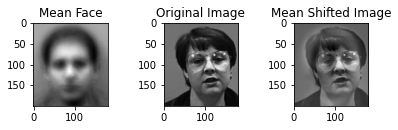

In [7]:
print("Mean Face")
show(facialRec.meanFace)
print("Original Image")
show(facialRec.F[:,0])
print("Mean Shifted Image")
show(facialRec.FBar[:,0])

ax1 = plt.subplot(131)
ax1.imshow(np.reshape(facialRec.meanFace, (200,180)), cmap="gray")
ax1.set_title("Mean Face")

ax2 = plt.subplot(132)
ax2.imshow(np.reshape(facialRec.F[:,0], (200,180)), cmap="gray")
ax2.set_title("Original Image")

ax3 = plt.subplot(133)
ax3.imshow(np.reshape(facialRec.FBar[:,0], (200,180)), cmap="gray")
ax3.set_title("Mean Shifted Image")

plt.subplots_adjust(wspace=0.75, hspace=1)

plt.show()

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


first eigenface


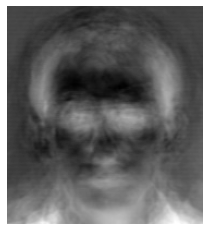

50th eigenface


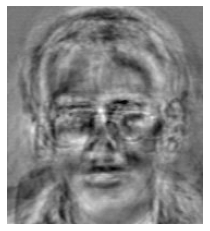

100th eigenface


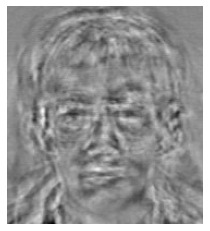

In [8]:
print("first eigenface")
show(facialRec.U[:,0])
print("50th eigenface")
show(facialRec.U[:,50])
print("100th eigenface")
show(facialRec.U[:,100])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

Original Image


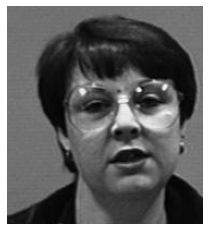

Reconstruction 5


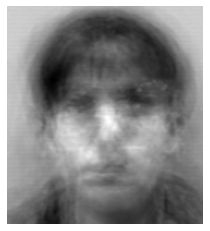

Reconstruction 10


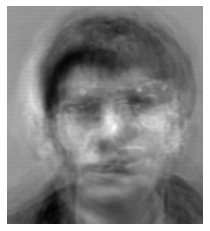

Reconstruction 19


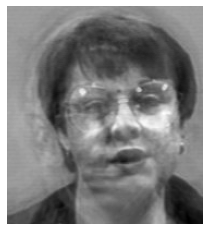

Reconstruction 75


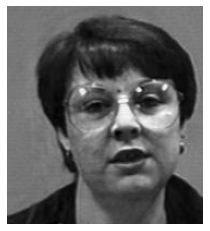

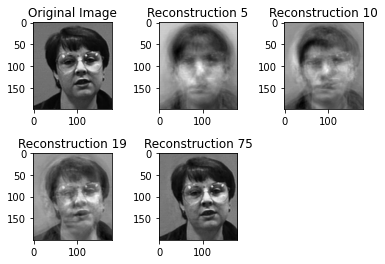

In [9]:
originalImg = facialRec.F[:,0]
print("Original Image")
show(originalImg)
shiftedImg = facialRec.FBar[:,0]

s = 5
fHat5 = facialRec.project(shiftedImg, s)
reconstruction5 = facialRec.U[:,:s] @ fHat5 + facialRec.meanFace
print("Reconstruction 5")
show(reconstruction5)

s = 10
fHat10 = facialRec.project(shiftedImg, s)
reconstruction10 = facialRec.U[:,:s] @ fHat10 + facialRec.meanFace
print("Reconstruction 10")
show(reconstruction10)

s = 19
fHat19 = facialRec.project(shiftedImg, s)
reconstruction19 = facialRec.U[:,:s] @ fHat19 + facialRec.meanFace
print("Reconstruction 19")
show(reconstruction19)

s = 75
fHat75 = facialRec.project(shiftedImg, s)
reconstruction75 = facialRec.U[:,:s] @ fHat75 + facialRec.meanFace
print("Reconstruction 75")
show(reconstruction75)

ax1 = plt.subplot(231)
ax1.imshow(np.reshape(originalImg, (200,180)), cmap="gray")
ax1.set_title("Original Image")

ax2 = plt.subplot(232)
ax2.imshow(np.reshape(reconstruction5, (200,180)), cmap="gray")
ax2.set_title("Reconstruction 5")

ax3 = plt.subplot(233)
ax3.imshow(np.reshape(reconstruction10, (200,180)), cmap="gray")
ax3.set_title("Reconstruction 10")

ax4 = plt.subplot(234)
ax4.imshow(np.reshape(reconstruction19, (200,180)), cmap="gray")
ax4.set_title("Reconstruction 19")

ax5 = plt.subplot(235)
ax5.imshow(np.reshape(reconstruction75, (200,180)), cmap="gray")
ax5.set_title("Reconstruction 75")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

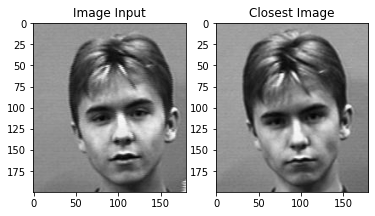

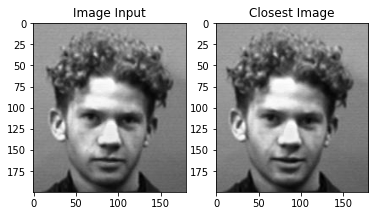

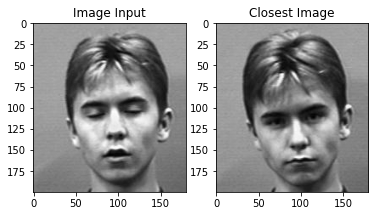

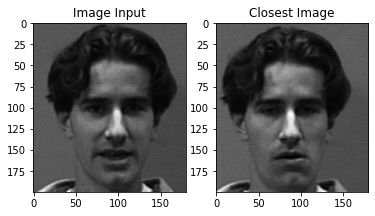

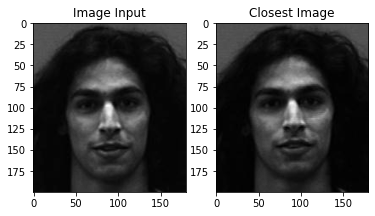

In [12]:
randFaces = sample_faces(5)
for face in randFaces:
    facialRec.match(face)